## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: A549
# EMBRACENET

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
#!rm SA_optuna_tuning.db

In [3]:
# create a database to store optuna studies with sqlite backendù
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [4]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [5]:
cell_line = CELL_LINES[0]
cell_line

'A549'

---

In [6]:
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline
from BIOINF_tesi.models import EmbraceNetMultimodal
from BIOINF_tesi.models.utils import Kfold_CV_Multimodal

In [ ]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

---

In [10]:
from BIOINF_tesi.models.utils import select_augmented_models
results_dict = select_augmented_models(results_dict, verbose=True)


A549
active_E_vs_inactive_E
pvalue: 0.5126907602619233
Best augmentation method: double

A549
active_EP_vs_inactive_rest
pvalue: 0.5126907602619233
Best augmentation method: double

K562
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double

MCF7
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double

H1
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double


In [11]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [46]:
task = TASKS[0]

In [47]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [48]:
model=EmbraceNetMultimodal

In [49]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (32940) in class 0 will be larger than the number of samples in the majority class (class #0 -> 26479)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:15:20,133] Using an existing study with name 'A549_active_E_vs_inactive_E_EmbraceNetMultimodal_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (48620) in class 0 will be larger than the number of samples in the majority class (class #0 -> 3975

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.05795546003292484
  Params: 
    dropout_l0: 0.7
    embracement_size: 1024
    lr: 0.004995467883341992
    n_post_layers: 1
    n_units_l0: 64
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.3143530378989152
    weight_decay: 0.005344233898132407

===============> MODEL TESTING
AUPRC test score: 0.05576877274952925


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (31640) in class 0 will be larger than the number of samples in the majority class (class #0 -> 26544)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:16:04,548] Using an existing study with name 'A549_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (47840) in class 0 will be larger than the number of samples in the majority class (class #0 -> 39

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.06205922351375953
  Params: 
    dropout_l0: 0.0
    embracement_size: 512
    lr: 0.024780940758138293
    n_post_layers: 1
    n_units_l0: 256
    optimizer: Nadam
    selection_probabilities_FFNN: 0.40931521234053236
    weight_decay: 0.008765171784423762

===============> MODEL TESTING
AUPRC test score: 0.05733118172790469


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (32820) in class 0 will be larger than the number of samples in the majority class (class #0 -> 26485)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:16:52,101] Using an existing study with name 'A549_active_E_vs_inactive_E_EmbraceNetMultimodal_1_2_3' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (47660) in class 0 will be larger than the number of samples in the majority class (class #0 -> 

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.10751056324999983
  Params: 
    embracement_size: 512
    lr: 0.018867754390449888
    n_post_layers: 0
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.3858189787588705
    weight_decay: 0.04056925139934231

===============> MODEL TESTING
AUPRC test score: 0.06085062915899512



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.05798


In [50]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [51]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [ ]:
task = TASKS[1]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [ ]:
task = TASKS[2]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [8]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [9]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [12]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 14:19:22,968] Using an existing study with name 'A549_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.39837973194553344
  Params: 
    CNN_dropout_l0: 0.2
    CNN_kernel_size_l0: 11
    CNN_n_layers: 1
    CNN_out_channels_l0: 16
    EMBRACENET_dropout_l0: 0.3
    EMBRACENET_embracement_size: 512
    EMBRACENET_n_units_l0: 64
    FFNN_dropout_l0: 0.4
    FFNN_n_layers: 1
    FFNN_n_units_l0: 256
    lr: 0.004915716485089496
    n_post_layers: 1
    optimizer: Adam
    selection_probabilities_FFNN: 0.24156436666118708
    weight_decay: 0.0116660154523596

===============> MODEL TESTING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 14:44:20,567] A new study created in RDB with name: A549_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2


EarlyStopping counter: 5 out of 5
Early stopping the training
AUPRC test score: 0.4001960858216522


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/timm/optim/nadam.py:69: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1025.)
  grad = grad.add(group['weight_decay'], p.data)


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-16 14:57:58,082] Trial 0 finished with value: 0.39688172809581523 and parameters: {'FFNN_n_layers': 3, 'FFNN_n_units_l0': 128, 'FFNN_dropout_l0': 0.2, 'FFNN_n_units_l1': 32, 'FFNN_dropout_l1': 0.0, 'FFNN_n_units_l2': 64, 'FFNN_dropout_l2': 0.0, 'CNN_n_layers': 3, 'CNN_out_channels_l0': 16, 'CNN_kernel_size_l0': 15, 'CNN_dropout_l0': 0.4, 'CNN_out_channels_l1': 96, 'CNN_kernel_size_l1': 5, 'CNN_dropout_l1': 0.5, 'CNN_out_channels_l2': 96, 'CNN_kernel_size_l2': 5, 'CNN_dropout_l2': 0.4, 'EMBRACENET_embracement_size': 512, 'n_post_layers': 2, 'EMBRACENET_n_units_l0': 32, 'EMBRACENET_dropout_l0': 0.7, 'EMBRACENET_n_units_l1': 128, 'EMBRACENET_dropout_l1': 0.3, 'selection_probabilities_FFNN': 0.4272918886021825, 'optimizer': 'Nadam', 'lr': 0.0015319785749912124, 'weight_decay': 0.030407503536006075}. Best is trial 0 with value: 0.39688172809581523.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-16 15:20:47,748] Trial 1 finished with value: 0.5693332183516883 and parameters: {'FFNN_n_layers': 2, 'FFNN_n_units_l0': 128, 'FFNN_dropout_l0': 0.4, 'FFNN_n_units_l1': 128, 'FFNN_dropout_l1': 0.3, 'CNN_n_layers': 4, 'CNN_out_channels_l0': 64, 'CNN_kernel_size_l0': 11, 'CNN_dropout_l0': 0.3, 'CNN_out_channels_l1': 96, 'CNN_kernel_size_l1': 11, 'CNN_dropout_l1': 0, 'CNN_out_channels_l2': 96, 'CNN_kernel_size_l2': 5, 'CNN_dropout_l2': 0.4, 'CNN_out_channels_l3': 512, 'CNN_kernel_size_l3': 5, 'CNN_dropout_l3': 0, 'EMBRACENET_embracement_size': 768, 'n_post_layers': 1, 'EMBRACENET_n_units_l0': 32, 'EMBRACENET_dropout_l0': 0.5, 'selection_probabilities_FFNN': 0.41514218840200257, 'optimizer': 'RMSprop', 'lr': 0.003144916548746644, 'weight_decay': 0.0001464834483574059}. Best is trial 1 with value: 0.5693332183516883.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-16 15:38:28,372] Trial 2 finished with value: 0.3969038283310758 and parameters: {'FFNN_n_layers': 3, 'FFNN_n_units_l0': 128, 'FFNN_dropout_l0': 0.0, 'FFNN_n_units_l1': 128, 'FFNN_dropout_l1': 0.4, 'FFNN_n_units_l2': 4, 'FFNN_dropout_l2': 0.4, 'CNN_n_layers': 2, 'CNN_out_channels_l0': 64, 'CNN_kernel_size_l0': 15, 'CNN_dropout_l0': 0.2, 'CNN_out_channels_l1': 32, 'CNN_kernel_size_l1': 15, 'CNN_dropout_l1': 0.5, 'EMBRACENET_embracement_size': 512, 'n_post_layers': 0, 'selection_probabilities_FFNN': 0.10249866751653691, 'optimizer': 'Nadam', 'lr': 0.08667733860095615, 'weight_decay': 0.001933263832178513}. Best is trial 1 with value: 0.5693332183516883.


EarlyStopping counter: 5 out of 5
Early stopping the training
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5693332183516883
  Params: 
    CNN_dropout_l0: 0.3
    CNN_dropout_l1: 0
    CNN_dropout_l2: 0.4
    CNN_dropout_l3: 0
    CNN_kernel_size_l0: 11
    CNN_kernel_size_l1: 11
    CNN_kernel_size_l2: 5
    CNN_kernel_size_l3: 5
    CNN_n_layers: 4
    CNN_out_channels_l0: 64
    CNN_out_channels_l1: 96
    CNN_out_channels_l2: 96
    CNN_out_channels_l3: 512
    EMBRACENET_dropout_l0: 0.5
    EMBRACENET_embracement_size: 768
    EMBRACENET_n_units_l0: 32
    FFNN_dropout_l0: 0.4
    FFNN_dropout_l1: 0.3
    FFNN_n_layers: 2
    FFNN_n_units_l0: 128
    FFNN_n_units_l1: 128
    lr: 0.003144916548746644
    n_post_layers: 1
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.41514218840200257
    weight_decay: 0.0001464834483574059

===============> MODEL TESTING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-16 17:26:35,134] A new study created in RDB with name: A549_inactive_E_vs_inactive_P_EmbraceNetMultimodal_1_2_3


EarlyStopping counter: 5 out of 5
Early stopping the training
AUPRC test score: 0.49229906235830145


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-16 17:35:20,845] Trial 0 finished with value: 0.5338685690118354 and parameters: {'FFNN_n_layers': 2, 'FFNN_n_units_l0': 64, 'FFNN_dropout_l0': 0.3, 'FFNN_n_units_l1': 16, 'FFNN_dropout_l1': 0.2, 'CNN_n_layers': 2, 'CNN_out_channels_l0': 16, 'CNN_kernel_size_l0': 5, 'CNN_dropout_l0': 0.2, 'CNN_out_channels_l1': 64, 'CNN_kernel_size_l1': 5, 'CNN_dropout_l1': 0, 'EMBRACENET_embracement_size': 512, 'n_post_layers': 0, 'selection_probabilities_FFNN': 0.10657002175985586, 'optimizer': 'Adam', 'lr': 0.0020408389859879797, 'weight_decay': 0.0001556714312747527}. Best is trial 0 with value: 0.5338685690118354.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [ ]:
task = TASKS[4]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [73]:
model=EmbraceNetMultimodal

In [74]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (121900) in class 0 will be larger than the number of samples in the majority class (class #0 -> 66423)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:18:54,146] Using an existing study with name 'A549_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (182840) in class 0 will be larger than the number of samples in the majority class (class #0 -

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21145857971575374
  Params: 
    dropout_l0: 0.3
    embracement_size: 768
    lr: 1.8990348084145928e-05
    n_post_layers: 1
    n_units_l0: 32
    optimizer: Adam
    selection_probabilities_FFNN: 0.8512903807499456
    weight_decay: 0.0938539302099591

===============> MODEL TESTING
AUPRC test score: 0.08757654450669158


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (123880) in class 0 will be larger than the number of samples in the majority class (class #0 -> 66324)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:23:39,179] Using an existing study with name 'A549_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (186300) in class 0 will be larger than the number of samples in the majority class (class #0

Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2154300996036086
  Params: 
    dropout_l0: 0.3
    embracement_size: 512
    lr: 0.004172247391246969
    n_post_layers: 1
    n_units_l0: 32
    optimizer: RMSprop
    selection_probabilities_FFNN: 0.44151174793763326
    weight_decay: 0.0011375776841732103

===============> MODEL TESTING
AUPRC test score: 0.08672902532096671


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (124880) in class 0 will be larger than the number of samples in the majority class (class #0 -> 66274)
  warnings.warn(
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-15 12:27:49,649] Using an existing study with name 'A549_active_EP_vs_inactive_rest_EmbraceNetMultimodal_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2186133514274023
  Params: 
    embracement_size: 1024
    lr: 0.00021785351958555343
    n_post_layers: 0
    optimizer: Adam
    selection_probabilities_FFNN: 0.867151936715719
    weight_decay: 0.006295588575474524

===============> MODEL TESTING


/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (187060) in class 0 will be larger than the number of samples in the majority class (class #0 -> 99425)
  warnings.warn(


AUPRC test score: 0.08745044452918571



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.08725


In [75]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [76]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

## freezed layers

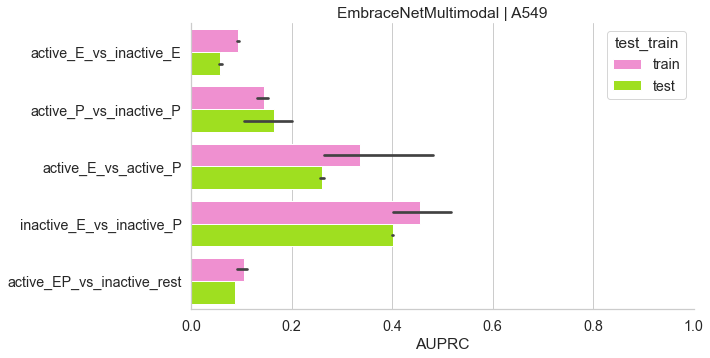

In [77]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

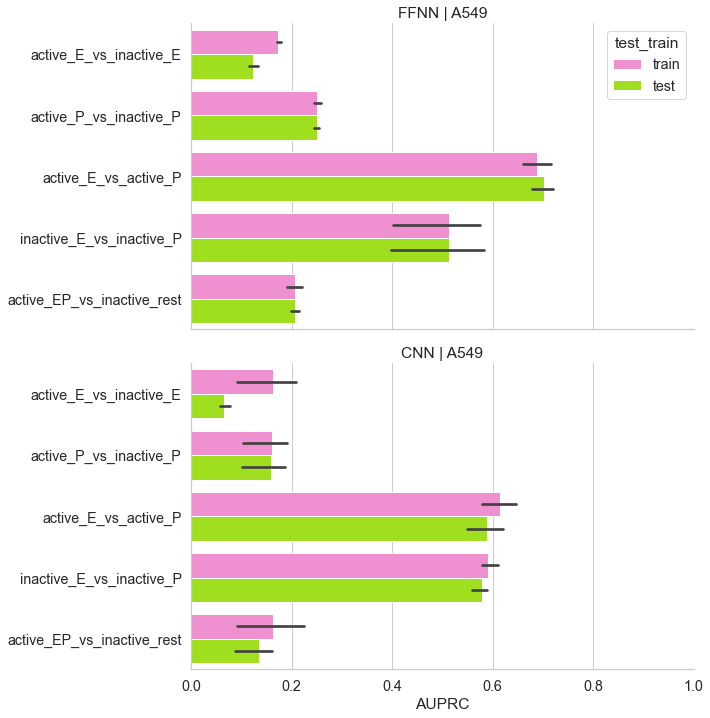

In [81]:
plot_scores(cells=cell_line, models=['CNN','FFNN'])

## not freezed layers

In [ ]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])